In [123]:
#모듈 임포트!
import seaborn as sns
import pandas as pd
import numpy as np

In [124]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_row', 500)

In [125]:
raw_data = sns.load_dataset('titanic')
print(raw_data.head(50))

    survived  pclass     sex   age  sibsp  parch      fare embarked   class  \
0          0       3    male  22.0      1      0    7.2500        S   Third   
1          1       1  female  38.0      1      0   71.2833        C   First   
2          1       3  female  26.0      0      0    7.9250        S   Third   
3          1       1  female  35.0      1      0   53.1000        S   First   
4          0       3    male  35.0      0      0    8.0500        S   Third   
5          0       3    male   NaN      0      0    8.4583        Q   Third   
6          0       1    male  54.0      0      0   51.8625        S   First   
7          0       3    male   2.0      3      1   21.0750        S   Third   
8          1       3  female  27.0      0      2   11.1333        S   Third   
9          1       2  female  14.0      1      0   30.0708        C  Second   
10         1       3  female   4.0      1      1   16.7000        S   Third   
11         1       1  female  58.0      0      0   2

In [126]:
print(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB
None


In [127]:
#결측치 확인
raw_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [128]:
clean_data = raw_data.dropna(axis=1, thresh = 500) #nan 값이 500개 이상일 경우 컬럼 drop
print(clean_data.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


In [129]:
#age컬럼의 nan값을 mean으로 채우기 위해 mean 값 구하기
mean_age = clean_data['age'].mean()
print(mean_age)

29.69911764705882


In [130]:
print(clean_data.head(10))

   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male  embark_town alive  alone  
0    man        True  Southampton    no  False  
1  woman       False    Cherbourg   yes  False  
2  wo

In [131]:
#age 컬럼을 mean_age로 바꾸기, inplace 값을 True로 주면 원본 데이터에 바뀐 데이터를 저장
df = clean_data['age'].fillna(mean_age, inplace = True)

#inplace = True시 df는 저장되지 않음
# df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [132]:
#nan값이 존재하던 5번 데이터에 나이값이 생성됐음을 확인
print(clean_data.head(10))

   survived  pclass     sex        age  sibsp  parch     fare embarked  \
0         0       3    male  22.000000      1      0   7.2500        S   
1         1       1  female  38.000000      1      0  71.2833        C   
2         1       3  female  26.000000      0      0   7.9250        S   
3         1       1  female  35.000000      1      0  53.1000        S   
4         0       3    male  35.000000      0      0   8.0500        S   
5         0       3    male  29.699118      0      0   8.4583        Q   
6         0       1    male  54.000000      0      0  51.8625        S   
7         0       3    male   2.000000      3      1  21.0750        S   
8         1       3  female  27.000000      0      2  11.1333        S   
9         1       2  female  14.000000      1      0  30.0708        C   

    class    who  adult_male  embark_town alive  alone  
0   Third    man        True  Southampton    no  False  
1   First  woman       False    Cherbourg   yes  False  
2   Third  wom

In [133]:
#중복되는 embark_town(embarked와 중복)과 alive(survived와 중복) 삭제
clean_data.drop(['embark_town', 'alive'], axis = 1, inplace = True)

print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    889 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [134]:
#embarked의 nan 값 확인
print(clean_data['embarked'][825:830])

825      Q
826      S
827      C
828      Q
829    NaN
Name: embarked, dtype: object


In [135]:
#embarked의 nan 값을 다양한 값 (ex.최빈값(가장 많은 값), 이전값, 이후값)으로 채우기

#이전값 ffill 이후값 bfill
clean_data['embarked'].fillna(method = 'ffill', inplace = True)
print(clean_data['embarked'][825:830])

825    Q
826    S
827    C
828    Q
829    Q
Name: embarked, dtype: object


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [136]:
#nan 값 제거 확인
print(clean_data.isnull().sum())

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alone         0
dtype: int64


In [137]:
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(3)
memory usage: 65.5+ KB
None


In [138]:
#카테고리형 데이터 숫자형 데이터로 변환
clean_data['sex'].replace({'male':0, 'female':1}, inplace = True)

print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(5), object(2)
memory usage: 65.5+ KB
None


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [139]:
#clean_dat 특정 컬럼에 있는 모든 값을 unique 함수로 확인
print(clean_data['sex'].unique())

[0 1]


In [140]:
#clean_dat 특정 컬럼에 있는 모든 값을 unique 함수로 확인
print(clean_data['embarked'].unique())

['S' 'C' 'Q']


In [141]:
#데이터 값이 다양해서 replace를 사용하기 힘들 경우 sklearn의 인코더를 사용
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

In [142]:
#embarked의 값들 갯수 확인
print(clean_data['embarked'].value_counts())

S    644
C    169
Q     78
Name: embarked, dtype: int64


In [143]:
#embarked 데이터 라벨로 변환
clean_data['embarked'] = label_encoder.fit_transform(clean_data['embarked'])
print(clean_data['embarked'].unique())

[2 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [144]:
#변경된 데이터 값 확인 (int로 변경)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    int64   
 3   age         891 non-null    float64 
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    float64 
 7   embarked    891 non-null    int64   
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(6), object(1)
memory usage: 65.5+ KB
None


In [145]:
#class 데이터 라벨로 변환
clean_data['class'] = label_encoder.fit_transform(clean_data['class'])
print(clean_data['class'].unique())

[2 0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [146]:
#변경된 데이터 값 확인 (int로 변경)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(7), object(1)
memory usage: 71.5+ KB
None


In [147]:
#who 데이터 라벨로 변환
clean_data['who'] = label_encoder.fit_transform(clean_data['who'])
print(clean_data['who'].unique())

[1 2 0]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [148]:
#변경된 데이터 값 확인 (int로 변경)
print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 71.5 KB
None


In [149]:
#bool타입 데이터 변환 및 확인
clean_data['adult_male'] = clean_data['adult_male'].astype('int64')

print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    bool   
dtypes: bool(1), float64(2), int64(9)
memory usage: 77.6 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [150]:
#bool타입 데이터 변환 및 확인
clean_data['alone'] = clean_data['alone'].astype('int64')

print(clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int64  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    int64  
 10  adult_male  891 non-null    int64  
 11  alone       891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB
None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
#target과 training 데이터 나누기
target = pd.DataFrame(clean_data.iloc[:, 0], columns = ['survived'])
training_data = clean_data.drop(['survived'], axis = 1)

print(training_data.head())
print(target.head())

   pclass  sex   age  sibsp  parch     fare  embarked  class  who  adult_male  \
0       3    0  22.0      1      0   7.2500         2      2    1           1   
1       1    1  38.0      1      0  71.2833         0      0    2           0   
2       3    1  26.0      0      0   7.9250         2      2    2           0   
3       1    1  35.0      1      0  53.1000         2      0    2           0   
4       3    0  35.0      0      0   8.0500         2      2    1           1   

   alone  
0      0  
1      0  
2      1  
3      0  
4      1  
   survived
0         0
1         1
2         1
3         1
4         0


In [152]:
#age와 fare 컬럼의 데이터 값 확인
value_data = training_data[['age', 'fare']]
print(value_data.head())

    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500


In [153]:
#스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(value_data)

#스케일링 후엔 데이터프레임이 풀리기 때문에 다시 데이터프레임화
value_data = pd.DataFrame(scaled_data, columns = value_data.columns)
print(value_data.head())

        age      fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337


In [154]:
print(value_data.describe())

                age          fare
count  8.910000e+02  8.910000e+02
mean   2.562796e-16 -4.373606e-17
std    1.000562e+00  1.000562e+00
min   -2.253155e+00 -6.484217e-01
25%   -5.924806e-01 -4.891482e-01
50%    0.000000e+00 -3.573909e-01
75%    4.079260e-01 -2.424635e-02
max    3.870872e+00  9.667167e+00


In [155]:
#age와 fare drop
training_data.drop(['age', 'fare'], axis = 1, inplace = True)
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [156]:
#get_dummies 함수 사용
#get_dummies 알아보기
onehot_data = pd.get_dummies(training_data['pclass'])
print(onehot_data.head())

   1  2  3
0  0  0  1
1  1  0  0
2  0  0  1
3  1  0  0
4  0  0  1


In [157]:
print(training_data.head())

   pclass  sex  sibsp  parch  embarked  class  who  adult_male  alone
0       3    0      1      0         2      2    1           1      0
1       1    1      1      0         0      0    2           0      0
2       3    1      0      0         2      2    2           0      1
3       1    1      1      0         2      0    2           0      0
4       3    0      0      0         2      2    1           1      1


In [158]:
onehot_data = pd.get_dummies(training_data, columns = training_data.columns)
print(onehot_data.head())

   pclass_1  pclass_2  pclass_3  sex_0  sex_1  sibsp_0  sibsp_1  ...  who_0  \
0         0         0         1      1      0        0        1  ...      0   
1         1         0         0      0      1        0        1  ...      0   
2         0         0         1      0      1        1        0  ...      0   
3         1         0         0      0      1        0        1  ...      0   
4         0         0         1      1      0        1        0  ...      0   

   who_1  who_2  adult_male_0  adult_male_1  alone_0  alone_1  
0      1      0             0             1        1        0  
1      0      1             1             0        1        0  
2      0      1             1             0        0        1  
3      0      1             1             0        1        0  
4      1      0             0             1        0        1  

[5 rows x 32 columns]


In [159]:
print(onehot_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   pclass_1      891 non-null    uint8
 1   pclass_2      891 non-null    uint8
 2   pclass_3      891 non-null    uint8
 3   sex_0         891 non-null    uint8
 4   sex_1         891 non-null    uint8
 5   sibsp_0       891 non-null    uint8
 6   sibsp_1       891 non-null    uint8
 7   sibsp_2       891 non-null    uint8
 8   sibsp_3       891 non-null    uint8
 9   sibsp_4       891 non-null    uint8
 10  sibsp_5       891 non-null    uint8
 11  sibsp_8       891 non-null    uint8
 12  parch_0       891 non-null    uint8
 13  parch_1       891 non-null    uint8
 14  parch_2       891 non-null    uint8
 15  parch_3       891 non-null    uint8
 16  parch_4       891 non-null    uint8
 17  parch_5       891 non-null    uint8
 18  parch_6       891 non-null    uint8
 19  embarked_0    891 non-null   

In [160]:
#value_data 와 onehot_date 합쳐서 trainig_data로 만들기

#concat으로 합치기
training_data = pd.concat([value_data, onehot_data], axis = 1)
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 34 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           891 non-null    float64
 1   fare          891 non-null    float64
 2   pclass_1      891 non-null    uint8  
 3   pclass_2      891 non-null    uint8  
 4   pclass_3      891 non-null    uint8  
 5   sex_0         891 non-null    uint8  
 6   sex_1         891 non-null    uint8  
 7   sibsp_0       891 non-null    uint8  
 8   sibsp_1       891 non-null    uint8  
 9   sibsp_2       891 non-null    uint8  
 10  sibsp_3       891 non-null    uint8  
 11  sibsp_4       891 non-null    uint8  
 12  sibsp_5       891 non-null    uint8  
 13  sibsp_8       891 non-null    uint8  
 14  parch_0       891 non-null    uint8  
 15  parch_1       891 non-null    uint8  
 16  parch_2       891 non-null    uint8  
 17  parch_3       891 non-null    uint8  
 18  parch_4       891 non-null    

In [167]:
#split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(training_data, target, test_size = 0.20)

print(X_train.shape)
# print(X_test.shape)
print(Y_train.shape)
# print(Y_test.shape)

(712, 34)
(712, 1)


In [166]:
#모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(512, input_dim = 34, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(256, input_dim = 34, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(128, input_dim = 34, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               17920     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [168]:
#모델 컴파일 및 모델 학습
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['binary_accuracy'])

fit_hist = model.fit(X_train, Y_train, batch_size = 50, epochs = 50, validation_split = 0.2)

Epoch 1/50
12/12 [==============================] - 1s 16ms/step - loss: 0.1806 - binary_accuracy: 0.7381 - val_loss: 0.1403 - val_binary_accuracy: 0.7832
Epoch 2/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1448 - binary_accuracy: 0.7979 - val_loss: 0.1349 - val_binary_accuracy: 0.7902
Epoch 3/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1428 - binary_accuracy: 0.8084 - val_loss: 0.1202 - val_binary_accuracy: 0.8182
Epoch 4/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1339 - binary_accuracy: 0.8260 - val_loss: 0.1247 - val_binary_accuracy: 0.8252
Epoch 5/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1311 - binary_accuracy: 0.8207 - val_loss: 0.1202 - val_binary_accuracy: 0.8392
Epoch 6/50
12/12 [==============================] - 0s 5ms/step - loss: 0.1230 - binary_accuracy: 0.8436 - val_loss: 0.1178 - val_binary_accuracy: 0.8392
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.1

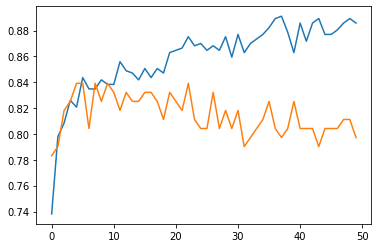

In [169]:
#시각화
import matplotlib.pyplot as plt

plt.plot(fit_hist.history['binary_accuracy'])
plt.plot(fit_hist.history['val_binary_accuracy'])
plt.show()

In [170]:
#결과값 확인
score = model.evaluate(X_test, Y_test, verbose = 0)

print('loss : ', score[0])
print('accuracy : ', score[1])

loss :  0.15343248844146729
accuracy :  0.8044692873954773
